Introduction to Artificial Intelligence - Supervised Learning lab Session Part 1a
--
At the end of this session, you will be able to : 
- Perform basic supervised learning tasks using sklearn.
- Apply supervised learning on PyRat datasets to predict the winner from the start configuration

In [77]:
# The tqdm package is useful to visualize progress with long computations. 
# Install it using pip. 
import tqdm
import numpy as np
import ast
import os
import sys

Basics of machine learning using sklearn
--

sklearn is a very powerful package that implements most machine learning methods. sklearn also includes cross-validation procedures in order to prevent overfitting, many useful metrics and data manipulation techniques that enables very careful experimentations with machine learning. It is also very straightforward to use. We will introduce a few basic concepts of sklearn. 

First, it is very easy to simulate data with sklearn. 

In [78]:
from sklearn.datasets import make_blobs

Use the function make_blobs to generate clouds of points with $d=2$, and visualize them using the function scatter from matplotlib.pyplot. You can generate as many samples as you want.You can generate several clouds of points using the argument centers. We recommend using random_state=0 so that your results are from the same distribution as our tests.

Vocabulary : n_samples is the number of generated samples, n_features is $d$ (number of dimensions), centers is the number of classes. 

Hint : you can use the output "y" as an argument for the color argument ("c") of the scatter function.

In [79]:
### CELL TO BE COMPLETED - Generate blobs.
X, y = make_blobs(n_samples=10000, centers=5, n_features=2, random_state=0)
print(X)
print(y)

[[ 9.20434625 -1.41174974]
 [-2.90770701  1.76924054]
 [ 1.83897751  3.6562493 ]
 ...
 [ 2.89380113  0.21073261]
 [ 0.7536644   3.39070811]
 [ 2.54636133  0.53227095]]
[4 2 0 ... 1 0 1]


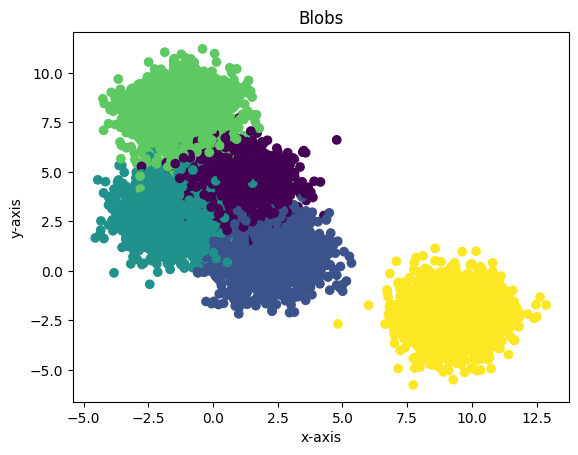

In [80]:
### CELL TO BE COMPLETED - Plot.
### Don't forget to import pyplot and use %matplotlib inline.
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Blobs")
plt.show()

You can use other arguments from make_blobs in order to change the variance of the blobs, or the coordinates of their center. You can also experiment on higher dimension, although it becomes difficult to visualize. 

sklearn has many other data generators, as well as ways to load standard datasets of various sizes. Check them out here: 

http://scikit-learn.org/stable/datasets


Now that we have generated a simple dataset, let's try to do a basic supervised learning approach. 

First, in order to mesure the ability of the model to generalize, we have to split the dataset into a training set and a test set. The test set is the part of the dataset that the model will not see during the training and will be used as a proxy for your "real world" examples.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*u03UsvBGwkYD4E7BObpcaw.png"></center>
<center><small>Image taken from https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8</small></center>

In sklearn, you can use the train_test_split function to split datasets.

Try to split the dataset you previously generated (the blobs) into x_train, x_test, y_train, y_test, with 80% in x_train and 20% in x_test. Set random_state = 0 so that the function always returns the same split.

In [81]:
#### CELL TO BE COMPLETED 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)


Check the shapes of the generated vectors.

In [82]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

Let's use a K-Nearest Neighbor classifier to test whether we can classify this dataset. Create a <b>classifier</b>, train it using your <b> training set </b> and evaluate it by its <b>accuracy</b> on both <b>the train and test sets</b>. 

In K-Nearest Neighbor classification (also known as KNN), when you want to predict the class of an object, you look at the K (an hyperparameter) nearest examples from the training (using a distance metric, in our case the euclidean distance). This object is then classified by a majority vote among its neighbors. In other words, the class of the object is the most common class among its neighbours.

To use a Nearest Neighbor with sklearn, you have to use the class [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

The sklearn API is consistent. This means that for almost every method they propose you can train it using [object.fit](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.fit), you can use it to make prediction with [object.predict](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.predict) and finally verify the <b>accuracy</b> of the method using [object.score](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier.score).

In [83]:
### CELL TO BE COMPLETED - Train the classifier and get the accuracy in both sets.
from sklearn.neighbors import KNeighborsClassifier
k = 1
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)

#training of the classifier 
classifier.fit(x_train, y_train) 

#accuracy of the training set 
training_accuracy = classifier.score(x_train, y_train)
print("Train accuracy : ", training_accuracy)
#accuracy of the test set
test_accuracy = classifier.score(x_test, y_test)
print("Test accuracy : ", test_accuracy)

Train accuracy :  1.0
Test accuracy :  0.9265


Your classifier should have a train accuracy of 1, while the test accuracy should be high but not perfect.

This is caused by the bias-variance trade-off. The 1-NN classifier always has a bias of 0 (it perfectly classifies the training set) but it has a high variance given that having one more example in the training set can completely change a decision.

Try to avoid having such a high variance, test different values of k and plot the accuracies given the different values of the hyperparameter k. 

If you have time, we advise you to do the same analysis but varying the train/test split size.

Top 10 combinations of k and train/test size with the highest average accuracy:
(1, 0.1): 0.9700
(1, 0.2): 0.9632
(1, 0.3): 0.9612
(1, 0.6): 0.9599
(1, 0.7): 0.9594
(1, 0.8): 0.9581
(1, 0.9): 0.9578
(1, 0.5): 0.9574
(1, 0.4): 0.9571
(3, 0.1): 0.9561

Top 10 combinations of k and train/test size with the lowest difference between training and testing accuracy:
(10, 0.3): 0.0001
(5, 0.2): 0.0008
(4, 0.2): 0.0009
(22, 0.4): 0.0012
(24, 0.4): 0.0012
(12, 0.3): 0.0013
(13, 0.9): 0.0014
(17, 0.8): 0.0016
(4, 0.1): 0.0019
(20, 0.4): 0.0019

Top 10 combinations of k and train/test size with the lowest bias:
(24, 0.1): -0.0073
(23, 0.1): -0.0070
(14, 0.1): -0.0064
(16, 0.1): -0.0061
(19, 0.1): -0.0059
(17, 0.1): -0.0056
(15, 0.1): -0.0054
(22, 0.1): -0.0054
(15, 0.2): -0.0054
(20, 0.2): -0.0054

Top 10 combinations of k and train/test size with the lowest variance:
(10, 0.3): 0.0000
(5, 0.2): 0.0000
(4, 0.2): 0.0000
(22, 0.4): 0.0000
(24, 0.4): 0.0000
(12, 0.3): 0.0000
(13, 0.9): 0.0000
(17, 0.

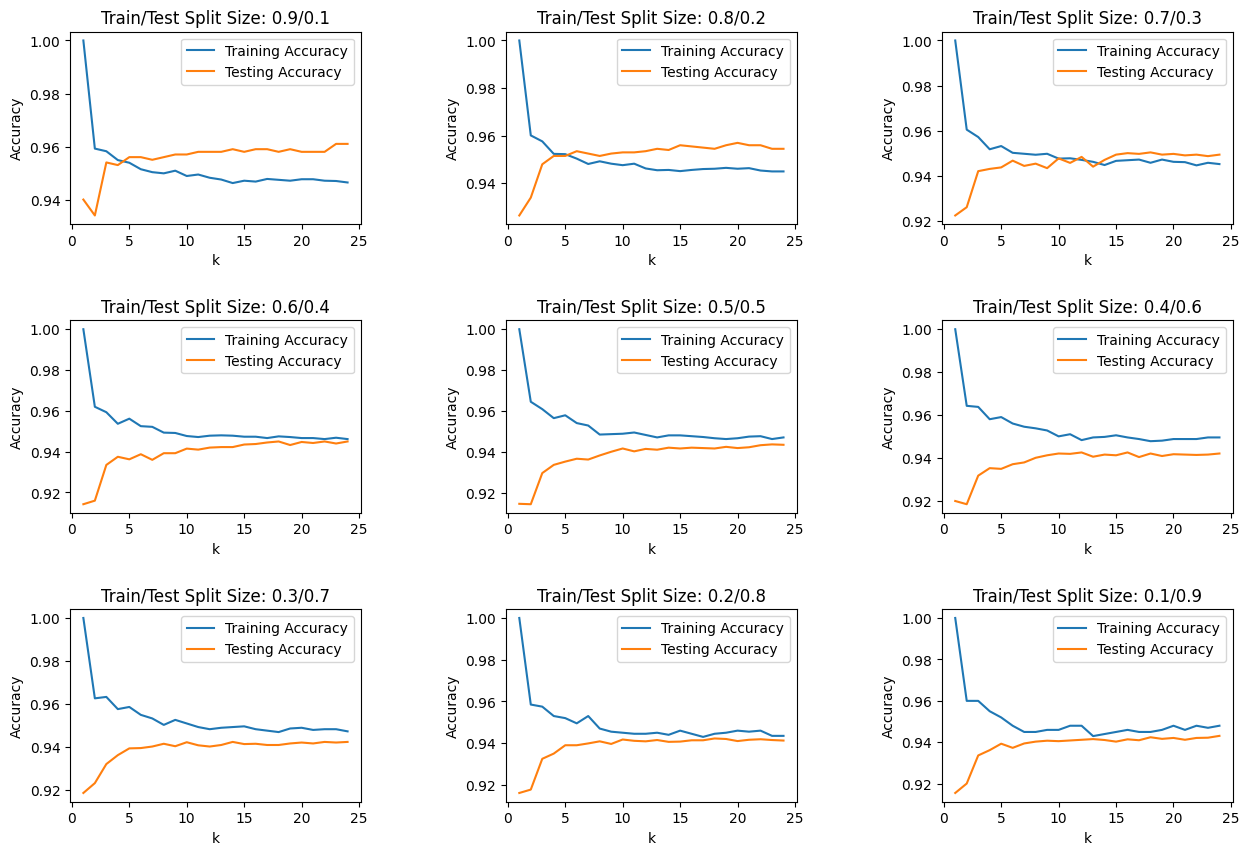

In [84]:
# CELL TO BE COMPLETED - Train networks with varying k.
# train_acc_p = list()
# test_acc_p = list()  # list storing the test set accuracies
# test_ks = range(1,25)  # list containing values of k to be tested

# List to store training accuracies for each value of k and train/test split size
train_acc_p = []

# List to store testing accuracies for each value of k and train/test split size
test_acc_p = []

# List containing values of k to be tested
test_ks = range(1, 25)

# List containing train/test split sizes to be tested
split_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Dictionary to store average accuracies for each combination of k and train/test size
avg_acc = {}
dif_acc = {}
bias = {}
variance = {}

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Iterate over train/test split sizes
for i, split_size in enumerate(split_sizes):
    # Split data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=split_size, random_state=0)

    # Train networks with varying k
    for k in test_ks:
        # Create classifier
        classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)

        # Train classifier
        classifier.fit(x_train, y_train)

        # Calculate training accuracy
        train_acc = classifier.score(x_train, y_train)
        train_acc_p.append(train_acc)

        # Calculate testing accuracy
        test_acc = classifier.score(x_test, y_test)
        test_acc_p.append(test_acc)
        
        # Calculate average accuracy for this combination of k and train/test size
        avg_acc[(k, split_size)] = np.mean([train_acc, test_acc])
        # Calculate difference between training and testing accuracy for this combination of k and train/test size
        dif_acc[(k, split_size)] = abs(train_acc - test_acc)
        # Calculate bias for this combination of k and train/test size
        bias[(k, split_size)] = train_acc - np.mean([train_acc, test_acc])
        # Calculate variance for this combination of k and train/test size
        variance[(k, split_size)] = np.mean([(train_acc - np.mean([train_acc, test_acc]))**2, (test_acc - np.mean([train_acc, test_acc]))**2])


    # Plot accuracies for each value of k
    axs[i // 3, i % 3].plot(test_ks, train_acc_p, label='Training Accuracy')
    axs[i // 3, i % 3].plot(test_ks, test_acc_p, label='Testing Accuracy')
    axs[i // 3, i % 3].set_title(f'Train/Test Split Size: {1 - split_size:.1f}/{split_size:.1f}')
    axs[i // 3, i % 3].set_xlabel('k')
    axs[i // 3, i % 3].set_ylabel('Accuracy')
    axs[i // 3, i % 3].legend()

    # Reset lists for next train/test split size
    train_acc_p = []
    test_acc_p = []

# Sort the dictionary by average accuracy in descending order
sorted_avg_acc = sorted(avg_acc.items(), key=lambda x: x[1], reverse=True)

# Sort the dictionary by difference accuracy in ascending order
sorted_dif_acc = sorted(dif_acc.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by bias in ascending order
sorted_bias = sorted(bias.items(), key=lambda x: x[1], reverse=False)

# Sort the dictionary by variance in ascending order
sorted_variance = sorted(variance.items(), key=lambda x: x[1], reverse=False)

# Print the top 10 combinations of k and train/test size with the highest average accuracy
print("Top 10 combinations of k and train/test size with the highest average accuracy:")
for i in range(10):
    print(f"{sorted_avg_acc[i][0]}: {sorted_avg_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest difference between training and testing accuracy
print("\nTop 10 combinations of k and train/test size with the lowest difference between training and testing accuracy:")
for i in range(10):
    print(f"{sorted_dif_acc[i][0]}: {sorted_dif_acc[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest bias
print("\nTop 10 combinations of k and train/test size with the lowest bias:")
for i in range(10):
    print(f"{sorted_bias[i][0]}: {sorted_bias[i][1]:.4f}")

# Print the top 10 combinations of k and train/test size with the lowest variance
print("\nTop 10 combinations of k and train/test size with the lowest variance:")
for i in range(10):
    print(f"{sorted_variance[i][0]}: {sorted_variance[i][1]:.4f}")
    

# Show plot
plt.show()


Once your classifier is trained, and bias-variance analysed, it is time to look at other metrics based on your results. It is important to remember that accuracy is a key metric, but it is not the <b> only </b> metric you should be focusing on.

Print a [classification report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) and a [confusion matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for both training and test sets.

In the classification report, you are going to see 3 new metrics. They are really important because the accuracy does not show a complete portrait of your results.

* Precision: Percentage of correctly classified examples with respect to all retrieved examples
* Recall: Percentage of correctly classified examples with respect to all examples belonging to a given class
* F1 Score: Harmonic mean from precision and recall.

In [85]:
### CELL TO BE COMPLETED - Generate the report and confusion matrix for the test set.

from sklearn.metrics import classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=0)

# Choose the value of k
k = 5

# Train the classifier
classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
classifier.fit(x_train, y_train)

# Predict the training and testing set labels
y_train_pred = classifier.predict(x_train)
y_test_pred = classifier.predict(x_test)

# Generate the classification report for the training set
print("Classification report for training set:")
print(classification_report(y_train, y_train_pred))

# Generate the confusion matrix for the training set
print("Confusion matrix for training set:")
print(confusion_matrix(y_train, y_train_pred))

# Generate the classification report for the testing set
print("Classification report for testing set:")
print(classification_report(y_test, y_test_pred))

# Generate the confusion matrix for the testing set
print("Confusion matrix for testing set:")
print(confusion_matrix(y_test, y_test_pred))


Classification report for training set:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       184
           1       0.96      0.96      0.96       216
           2       0.92      0.91      0.92       196
           3       0.99      0.98      0.98       218
           4       1.00      1.00      1.00       186

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Confusion matrix for training set:
[[167   4  12   1   0]
 [  8 207   1   0   0]
 [ 11   5 179   1   0]
 [  3   0   2 213   0]
 [  0   0   0   0 186]]
Classification report for testing set:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1816
           1       0.96      0.94      0.95      1784
           2       0.89      0.91      0.90      1804
           3       0.98      0.97      0.98      1782
          

Finally, you are going to plot the decision boundaries of our model. Use the function plot_boundaries given below. You can only do this if the tensor representing your data is two dimensional.

This function will test our model with values ranging from the smallest x to the highest x and from the lowest y to the highest y, each varying by $h$ and plot it nicely. [Link to the original implementation.](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

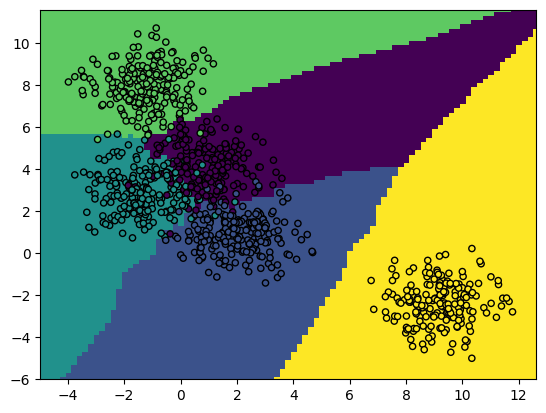

In [86]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

Predicting the winner in PyRat based on the initial cheese configuration
--

Use the code from lab1 in order to generate a PyRat dataset (X,y) of initial cheese configuration X each corresponding to a label of winner in y. 

The goal of the next part is to perform supervised learning on this dataset using a KNN classifier, as done above. Use the same metrics to estimate the performance of the classifier. 

We suggest that you start with a rather small maze, as the problem gets really high to solve in high dimensions.


In [87]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.

As for Lab1, you can run several games with the following function, by specifying the number of desired games with `nb_games` and the maze dimensions and number of cheeses

In [88]:
nb_games = 10

nb_cheese = 4
maze_width = 5
maze_height = 7

_, cheeses_10_games, winners_10_games = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

#print(f"Cheeses matrix: {cheeses_10_games}")
print(f"Winners: {winners_10_games}")

Game:   0%|          | 0/10 [00:00<?, ?it/s]

Winners: [0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 1.0, 0.0, 1.0]


You can use the `simulations` function to generate a dataset with the desired nb_cheese and maze dimensions and do more tests. However, as a start, you can also use the datasets we generated for you in Lab1.

In [89]:
### CELL TO BE COMPLETED 
# Load maze configuration and winners data from Lab1
cheeses_npz = np.load("cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]

winners_npz = np.load("winners_500_games_5x7_4.npz")
Y = winners_npz["data"]
print(f"Shape of X matrix: {X.shape},\nY matrix: {Y}")


Shape of X matrix: (500, 35),
Y matrix: [ 0.  0.  0. -1. -1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0. -1.  0.
 -1. -1.  1.  0. -1. -1.  0.  0.  0.  0.  1. -1.  0.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  0. -1.  0.  0.  1.  0.  1.  0.  1.  0. -1. -1.  0.
  0.  1.  0.  0. -1. -1. -1.  0. -1. -1.  0.  0.  1.  0.  0.  1.  0. -1.
  1. -1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.
  0.  0.  0.  0.  1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1.
  0.  1.  0. -1.  0. -1.  0. -1.  0. -1.  0.  0. -1. -1. -1.  0.  0. -1.
  0.  0.  1. -1.  0.  1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  1. -1.
  0. -1.  1.  0.  1.  0. -1.  0.  1.  1. -1. -1. -1.  0. -1.  0.  0.  0.
 -1.  0.  1.  0.  0. -1.  1.  0. -1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  1.  1.  0. -1.  0.  1. -1. -1. -1. -1.  0.  1.  0.  0. -1.
 -1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1. -1.  1.  1.  1.
 -1.  1. -1.  0.  1. -1.  1. -1. -1.  0.  0. -1.  1.  0. -1.  0.  1.  1.
 -1.  0.  0

In [90]:
### CELL TO BE COMPLETED 
# split dataset in train and test set
from sklearn.model_selection import train_test_split

# Split dataset in train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

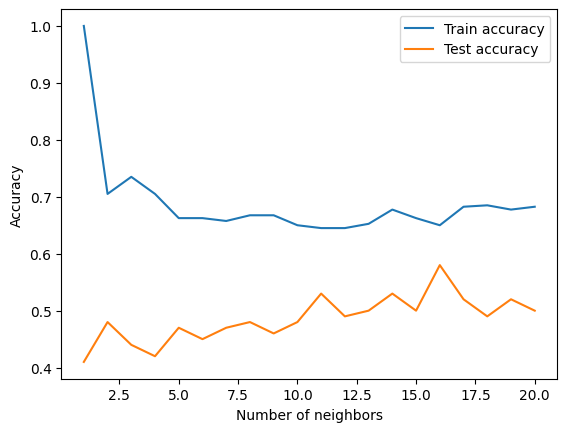

In [91]:
### CELL TO BE COMPLETED 
# train a KNN classifier and test it for different number of neighbors
from sklearn.neighbors import KNeighborsClassifier

# Liste pour stocker les précisions d'entraînement pour chaque valeur de k
train_accuracies = []

# Liste pour stocker les précisions de test pour chaque valeur de k
test_accuracies = []

# Valeurs de k à tester
k_values = range(1, 21)

# Itérer sur les valeurs de k
for k in k_values:

    # Entraîner un classifieur KNN sur les données d'entraînement
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    # Évaluer les performances du classifieur sur les données d'entraînement
    train_accuracy = knn.score(X_train, Y_train)
    train_accuracies.append(train_accuracy)

    # Évaluer les performances du classifieur sur les données de test
    test_accuracy = knn.score(X_test, Y_test)
    test_accuracies.append(test_accuracy)

# Tracer les courbes de précision en fonction de k
plt.plot(k_values, train_accuracies, label='Train accuracy')
plt.plot(k_values, test_accuracies, label='Test accuracy')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [92]:
### CELL TO BE COMPLETED 
#  Generate the report and confusion matrix for the test set.
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set using the trained KNN classifier
y_pred = knn.predict(X_test)

# Generate the classification report for the test set
print("Classification Report:\n")
print(classification_report(Y_test, y_pred))

# Generate the confusion matrix for the test set
cm = confusion_matrix(Y_test, y_pred)
print("\nConfusion Matrix:\n")
print(cm)


Classification Report:

              precision    recall  f1-score   support

        -1.0       0.55      0.55      0.55        29
         0.0       0.51      0.57      0.54        47
         1.0       0.39      0.29      0.33        24

    accuracy                           0.50       100
   macro avg       0.48      0.47      0.48       100
weighted avg       0.49      0.50      0.49       100


Confusion Matrix:

[[16 12  1]
 [10 27 10]
 [ 3 14  7]]


Now explore the performances of the KNN classifier with other maze dimentions and number of cheeses..

In [93]:
# List to store accuracies for each combination of nb_cheese, maze_width, maze_height and k
acc_list = []

# List of values for nb_cheese
nb_cheese_list = [2, 4, 6, 8]

# List of values for maze_width
maze_width_list = [5, 7, 10]

# List of values for maze_height
maze_height_list = [5, 7, 10]

# List of values for k
k_list = list(range(1, 26))

# Iterate over all combinations of nb_cheese, maze_width, maze_height and k
for nb_cheese in nb_cheese_list:
    for maze_width in maze_width_list:
        for maze_height in maze_height_list:
            for k in k_list:
                # Generate data using run_several_games function
                nb_games = 100
                _, cheeses, winners = simulations.run_several_games(program_1, program_2, nb_cheese=nb_cheese,
                                                                  maze_width=maze_width, maze_height=maze_height,
                                                                  nb_games=nb_games)
                # Train a KNN classifier and calculate accuracy on the whole dataset
                classifier = KNeighborsClassifier(n_neighbors=k, n_jobs=1)
                classifier.fit(cheeses, winners)
                acc = classifier.score(cheeses, winners)
                acc_list.append((nb_cheese, maze_width, maze_height, k, acc))

# Sort accuracies in descending order
acc_list.sort(key=lambda x: x[4], reverse=True)

# Print the accuracies for each combination of nb_cheese, maze_width, maze_height and k
print("Accuracies for each combination of nb_cheese, maze_width, maze_height and k:")
for item in acc_list:
    print(f"nb_cheese={item[0]}, maze_width={item[1]}, maze_height={item[2]}, k={item[3]}: {item[4]:.4f}")

Game:   0%|          | 0/100 [00:00<?, ?it/s]

Game:  43%|████▎     | 43/100 [02:04<02:12,  2.32s/it]